In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
ticker = 'PG'  
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [3]:
log_returns = np.log(1 + data.pct_change())

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [4]:
r = 0.025

In [5]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176551
dtype: float64

In [6]:
type(stdev)

pandas.core.series.Series

In [7]:
stdev = stdev.values
stdev

array([0.17655059])

In [8]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals 

iterations = 10000  

In [9]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [10]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [11]:
S

array([[85.41580963, 85.41580963, 85.41580963, ..., 85.41580963,
        85.41580963, 85.41580963],
       [86.13623273, 85.48917569, 85.29726144, ..., 85.90941372,
        84.67196952, 84.89714901],
       [85.73154762, 85.39518255, 85.19801265, ..., 86.30651039,
        83.70158197, 85.68848887],
       ...,
       [95.41217998, 92.33505256, 85.63491979, ..., 85.39798171,
        60.18838213, 80.63290441],
       [94.66633791, 94.74756448, 86.71685047, ..., 87.15530063,
        60.44178563, 81.97840449],
       [95.84988164, 94.42899487, 84.94513443, ..., 85.72194505,
        60.46023344, 81.87810272]])

In [12]:
S.shape

(251, 10000)

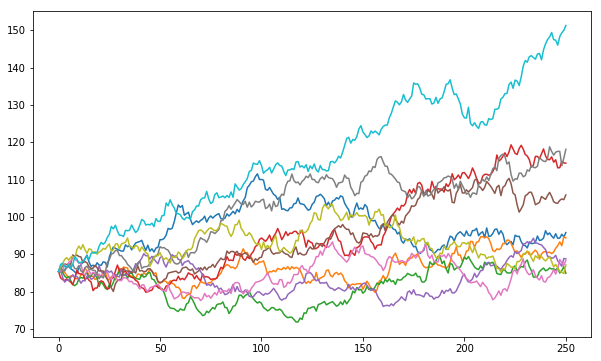

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);